# This notebook compares all populations to the ground truth data collected

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error, median_absolute_error, mean_absolute_error
from datetime import datetime
import os
from collections import defaultdict

from garisom_tools import GarisomModel
from garisom_tools.montecarlo.config import GarisomMonteCarloConfig
from garisom_tools.utils.metric import normalized_nash_sutcliffe_efficiency

In [464]:
data = {
    "ccr": {
        "pop": 1,
        "ground": {
            "hourly": "data/ground/ccr_hourly_data.csv",
            "leaft": "data/ground/ccr_leaftemp.csv",
            "stderr": "data/ground/ccr_std_error.csv",
            "gw_treatment_averages": "data/ground/ccr_gw_treatment_averages_pm.csv",
            "leaft_treatment_averages": "data/ground/ccr_leaftemp_treatment_averages_pm.csv",
            "leaf-air_treatment_averages": "data/ground/ccr_leaf-air_treatment_averages_pm.csv"
        },
        "pred": {
            "GW": {
                "low": "montecarlo/output/ccr/gw/20250728_111938/ci_low.csv",
                "high": "montecarlo/output/ccr/gw/20250728_111938/ci_high.csv",
                "main": "montecarlo/output/ccr/gw/20250728_111938/config.json",
            },
            "leaftemp": {
                "low": "montecarlo/output/ccr/leaftemp/20250728_111936/ci_low.csv",
                "high": "montecarlo/output/ccr/leaftemp/20250728_111936/ci_high.csv",
                "main": "montecarlo/output/ccr/leaftemp/20250728_111936/config.json",
            },
            "P-PD": {
                "low": "montecarlo/output/ccr/pd/20250728_115558/ci_low.csv",
                "high": "montecarlo/output/ccr/pd/20250728_115558/ci_high.csv",
                "main": "montecarlo/output/ccr/pd/20250728_115558/config.json",
            },
            "P-MD": {
                "low": "montecarlo/output/ccr/md/20250728_115833/ci_low.csv",
                "high": "montecarlo/output/ccr/md/20250728_115833/ci_high.csv",
                "main": "montecarlo/output/ccr/md/20250728_115833/config.json",
            },
        }
    },
    "nrv": {
        "pop": 3,
        "ground": {
            "hourly": "data/ground/nrv_hourly_data.csv",
            "leaft": "data/ground/nrv_leaftemp.csv",
            "stderr": "data/ground/nrv_std_error.csv",
            "gw_treatment_averages": "data/ground/nrv_gw_treatment_averages_pm.csv",
            "leaft_treatment_averages": "data/ground/nrv_leaftemp_treatment_averages_pm.csv",
            "leaf-air_treatment_averages": "data/ground/nrv_leaf-air_treatment_averages_pm.csv"
        },
        "pred": {
            "GW": {
                "low": "montecarlo/output/nrv/gw/20250728_133549/ci_low.csv",
                "high": "montecarlo/output/nrv/gw/20250728_133549/ci_high.csv",
                "main": "montecarlo/output/nrv/gw/20250728_133549/config.json",
            },
            "leaftemp": {
                "low": "montecarlo/output/nrv/leaftemp/20250728_140103/ci_low.csv",
                "high": "montecarlo/output/nrv/leaftemp/20250728_140103/ci_high.csv",
                "main": "montecarlo/output/nrv/leaftemp/20250728_140103/config.json",
            },
            "P-PD": {
                "low": "montecarlo/output/nrv/pd/20250728_141320/ci_low.csv",
                "high": "montecarlo/output/nrv/pd/20250728_141320/ci_high.csv",
                "main": "montecarlo/output/nrv/pd/20250728_141320/config.json",
            },
            "P-MD": {
                "low": "montecarlo/output/nrv/md/20250728_144204/ci_low.csv",
                "high": "montecarlo/output/nrv/md/20250728_144204/ci_high.csv",
                "main": "montecarlo/output/nrv/md/20250728_144204/config.json",
            },
        }
    },
    "tsz": {
        "pop": 4,
        "ground": {
            "hourly": "data/ground/tsz_hourly_data.csv",
            "leaft": "data/ground/tsz_leaftemp.csv",
            "stderr": "data/ground/tsz_std_error.csv",
            "gw_treatment_averages": "data/ground/tsz_gw_treatment_averages_pm.csv",
            "leaft_treatment_averages": "data/ground/tsz_leaftemp_treatment_averages_pm.csv",
            "leaf-air_treatment_averages": "data/ground/tsz_leaf-air_treatment_averages_pm.csv"
        },
        "pred": {
            "GW": {
                "low": "montecarlo/output/tsz/gw/20250728_144831/ci_low.csv",
                "high": "montecarlo/output/tsz/gw/20250728_144831/ci_high.csv",
                "main": "montecarlo/output/tsz/gw/20250728_144831/config.json",
            },
            "leaftemp": {
                "low": "montecarlo/output/tsz/leaftemp/20250728_152453/ci_low.csv",
                "high": "montecarlo/output/tsz/leaftemp/20250728_152453/ci_high.csv",
                "main": "montecarlo/output/tsz/leaftemp/20250728_152453/config.json",
            },
            "P-PD": {
                "low": "montecarlo/output/tsz/pd/20250728_152530/ci_low.csv",
                "high": "montecarlo/output/tsz/pd/20250728_152530/ci_high.csv",
                "main": "montecarlo/output/tsz/pd/20250728_152530/config.json",
            },
            "P-MD": {
                "low": "montecarlo/output/tsz/md/20250728_160227/ci_low.csv",
                "high": "montecarlo/output/tsz/md/20250728_160227/ci_high.csv",
                "main": "montecarlo/output/tsz/md/20250728_160227/config.json",
            },
        }
    },
    "jla": {
        "pop": 2,
        "ground": {
            "hourly": "data/ground/jla_hourly_data.csv",
            "leaft": "data/ground/jla_leaftemp.csv",
            "stderr": "data/ground/jla_std_error.csv",
            "gw_treatment_averages": "data/ground/jla_gw_treatment_averages_pm.csv",
            "leaft_treatment_averages": "data/ground/jla_leaftemp_treatment_averages_pm.csv",
            "leaf-air_treatment_averages": "data/ground/jla_leaf-air_treatment_averages_pm.csv"
        },
        "pred": {
            "GW": {
                "low": "montecarlo/output/jla/gw/20250728_122802/ci_low.csv",
                "high": "montecarlo/output/jla/gw/20250728_122802/ci_high.csv",
                "main": "montecarlo/output/jla/gw/20250728_122802/config.json",
            },
            "leaftemp": {
                "low": "montecarlo/output/jla/leaftemp/20250728_123033/ci_low.csv",
                "high": "montecarlo/output/jla/leaftemp/20250728_123033/ci_high.csv",
                "main": "montecarlo/output/jla/leaftemp/20250728_123033/config.json",
            },
            "P-PD": {
                "low": "montecarlo/output/jla/pd/20250728_130549/ci_low.csv",
                "high": "montecarlo/output/jla/pd/20250728_130549/ci_high.csv",
                "main": "montecarlo/output/jla/pd/20250728_130549/config.json",
            },
            "P-MD": {
                "low": "montecarlo/output/jla/md/20250728_131702/ci_low.csv",
                "high": "montecarlo/output/jla/md/20250728_131702/ci_high.csv",
                "main": "montecarlo/output/jla/md/20250728_131702/config.json",
            },
        }
    },
}

In [465]:
def get_output_from_space_parallel(pop: int, results_files: list[str], params, model_dir, config_file) -> list[pd.DataFrame | None]:
    
    Xs = []

    for result in results_files:
        config = GarisomMonteCarloConfig.from_json(result)
        Xs.append(config.parameters)

    outputs = GarisomModel.run_parallel(
        X=Xs,
        params=params,
        population=pop,
        config_file=config_file,
        model_dir=model_dir,
        workers=12
    )

    return outputs

In [466]:
def get_output_from_space(pop: int, result: str, params, model_dir, config_file) -> pd.DataFrame | None:
    
    config = GarisomMonteCarloConfig.from_json(result)

    outputs = GarisomModel.run(
        X=config.parameters,
        params=params,
        population=pop,
        config_file=config_file,
        model_dir=model_dir,
    )

    return outputs

In [467]:
params = pd.read_csv("./DBG-ground-leaftemp/parameters.csv")
model_dir = './garisom/02_program_code'
config_file = os.path.abspath("./DBG-ground-leaftemp/configuration.csv")

In [468]:
for pop in data.keys():
    num = data[pop]["pop"]
    for grd in data[pop]["ground"].keys():
        data[pop]["ground"][grd] = pd.read_csv(data[pop]["ground"][grd])
        
    main_res = []
    for var in data[pop]["pred"].keys():
        for prd in data[pop]["pred"][var].keys():
            if prd == "main" and data[pop]["pred"][var][prd]:
                main_res.append(data[pop]["pred"][var][prd])  # Get main result file to run batch
                # data[pop]["pred"][var][prd] = get_output_from_space(
                #     num,
                #     data[pop]["pred"][var][prd],
                #     params,
                #     model_dir,
                #     config_file
                # )
            elif data[pop]["pred"][var][prd]:
                data[pop]["pred"][var][prd] = pd.read_csv(data[pop]["pred"][var][prd])

    main_out = get_output_from_space_parallel(
                num,
                main_res,
                params,
                model_dir,
                config_file
            )
    
    for i, var in enumerate(data[pop]["pred"].keys()):
        for prd in data[pop]["pred"][var].keys():
            if prd == "main" and data[pop]["pred"][var][prd]:
                data[pop]["pred"][var][prd] = main_out[i]  # Take batched output and add accordingly

100%|██████████| 4/4 [00:05<00:00,  1.47s/it]


In [469]:
optim_var="GW"  # GW/leaftemp/P-PD/P-MD

## Metrics across populations

In [470]:
def cmp_pred_to_ground_metrics(columns, ground, pred, start, end, show=True):

    fit = {}

    for col in columns:

        col_ground = ground[ground['julian-day'].between(start, end)][col].dropna()
        col_pred = pred[col]

        col_pred = col_pred.loc[col_ground.index]
        
        mse = mean_squared_error(col_ground, col_pred)
        rmse = root_mean_squared_error(col_ground, col_pred)
        mape = mean_absolute_percentage_error(col_ground, col_pred)
        made = median_absolute_error(col_ground, col_pred)
        mae = mean_absolute_error(col_ground, col_pred)
        r2 = r2_score(col_ground, col_pred)
        r2 = 0 if r2 < 0 else r2
        nnse = normalized_nash_sutcliffe_efficiency(col_ground, col_pred)

        fit[col] = {
            'mse' : mse,
            'rmse' : rmse,
            'mape' : mape,
            'made' : made,
            'mae': mae,
            'r2' : r2,
            'nnse' : nnse
        }

        if show:

            # Plot ground vs pred with fitted line and 1:1 correspondence
            plt.figure(figsize=(8, 6))
            plt.scatter(col_ground, col_pred, label='Data Points', alpha=0.7)
            plt.plot([col_ground.min(), col_ground.max()], [col_ground.min(), col_ground.max()], 'r--', label='1:1 Line')
            
            # Fit a line to the data
            fit_coeff = np.polyfit(col_ground, col_pred, 1)
            fit_line = np.poly1d(fit_coeff)
            plt.plot(col_ground, fit_line(col_ground), 'b-', label=f'Fitted Line: y={fit_coeff[0]:.2f}x+{fit_coeff[1]:.2f}')
            
            # Add metrics as text
            plt.text(0.05, 0.95, ''.join([f'{key}: {value:.2f}\n' for key, value in fit[col].items()]), 
                transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
            
            plt.xlabel('Ground')
            plt.ylabel('Prediction')
            plt.title(f'Ground vs Prediction: {col}')
            plt.legend()
            plt.grid(True)
            plt.show()

    return fit

In [471]:
def get_overlap_perc(columns, ground, ground_stderr, pred_low, pred_high, start, end):

    fit = {}

    for col in columns:

        col_ground = ground[ground['julian-day'].between(start, end)][col].dropna()
        col_ground_stderr = ground_stderr[col].loc[col_ground.index]
        col_ground_low = col_ground - 1.96 * col_ground_stderr
        col_ground_high = col_ground + 1.96 * col_ground_stderr
        
        
        col_pred_low = pred_low[col]
        col_pred_low = col_pred_low.loc[col_ground.index]
        col_pred_high = pred_high[col]
        col_pred_high = col_pred_high.loc[col_ground.index]

        
        # Compute overlap: intervals [col_ground_low, col_ground_high] and [col_pred_low, col_pred_high]
        overlap_count = 0
        total = len(col_ground)
        for i in range(total):
            g_low = col_ground_low.iloc[i]
            g_high = col_ground_high.iloc[i]
            p_low = col_pred_low.iloc[i]
            p_high = col_pred_high.iloc[i]
            # Check if intervals overlap
            if (g_low <= p_high) and (p_low <= g_high):
                overlap_count += 1
        overlap_perc = overlap_count / total if total > 0 else np.nan

        fit[col] = overlap_perc

    return fit

In [472]:
columns = ['P-PD', 'P-MD', 'GW', 'E-MD', 'leaftemp']
start_day = 201
stress_begin = 223
predrought_cutoff = 238
drought = 240           # drought measurement period, collected 3 days after initial drought began
post_drought = 242
leaft_data_start = 205
end_day = 266

In [473]:
all_fits = {}
for pop in data.keys():
    ground = data[pop]["ground"]["hourly"]
    ground_stderr = data[pop]['ground']['stderr']
    pred = data[pop]["pred"][optim_var]["main"]
    pred_low = data[pop]["pred"][optim_var]["low"]
    pred_high = data[pop]["pred"][optim_var]["high"]

    print(f"Evaluating {pop} for {optim_var}")
    all_fits[pop] = cmp_pred_to_ground_metrics(columns, ground, pred, start_day, end_day, show=False)
    overlaps = get_overlap_perc(columns, ground, ground_stderr, pred_low, pred_high, start_day, end_day)
    for col in columns:
        all_fits[pop][col]['overlap'] = overlaps[col]


Evaluating ccr for GW
Evaluating nrv for GW
Evaluating tsz for GW
Evaluating jla for GW


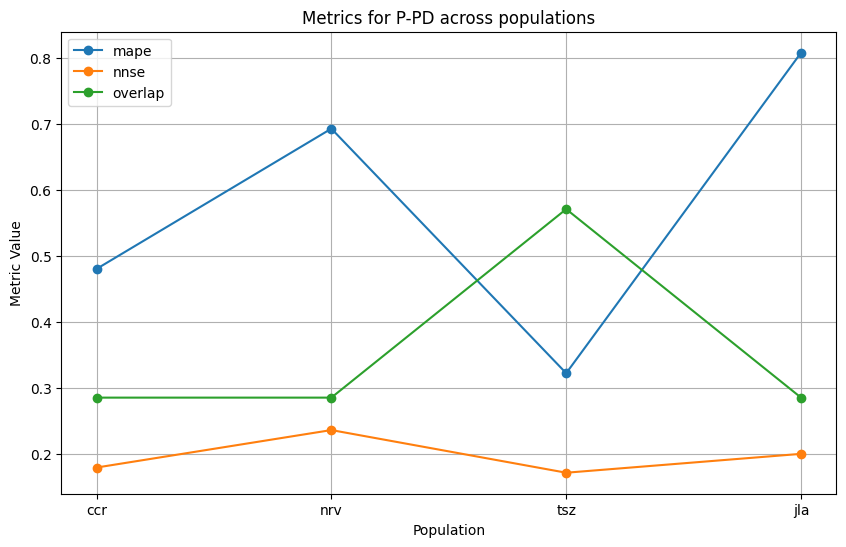

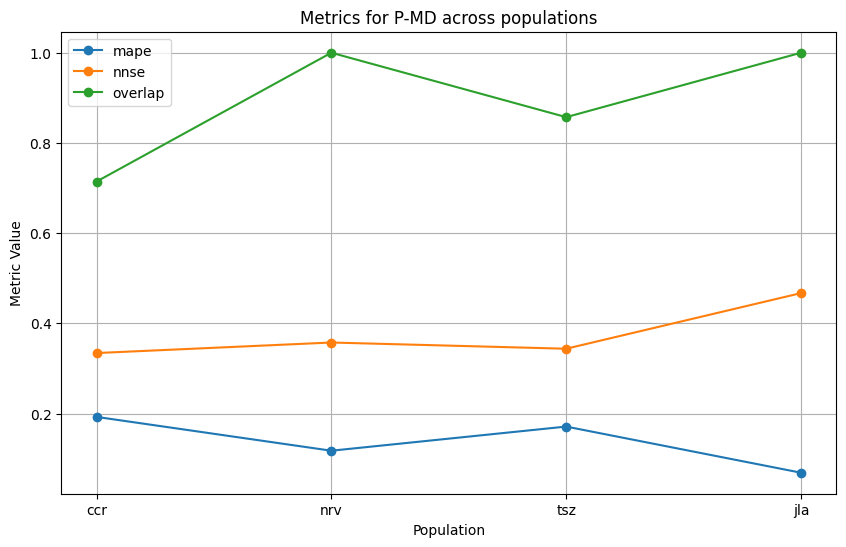

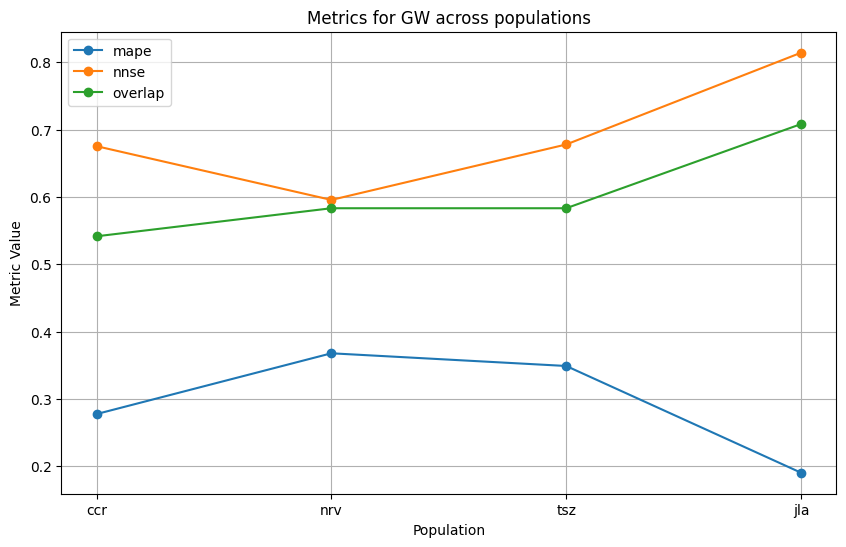

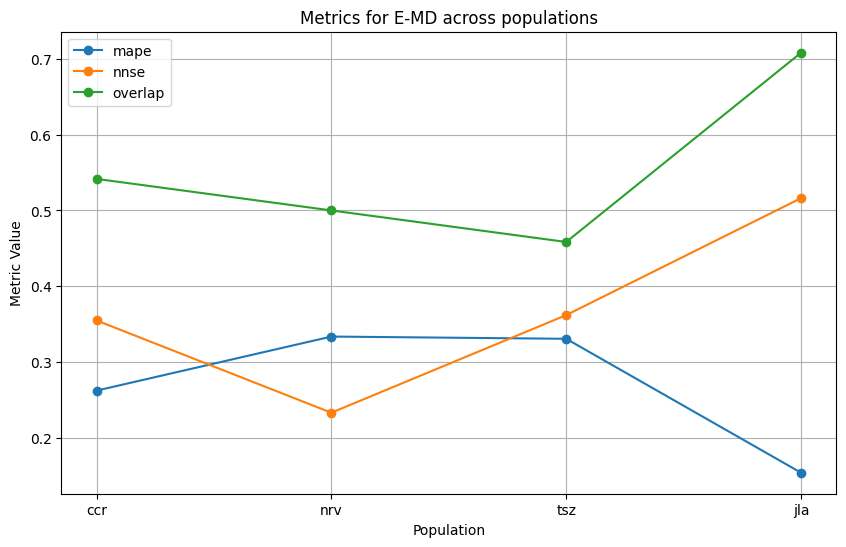

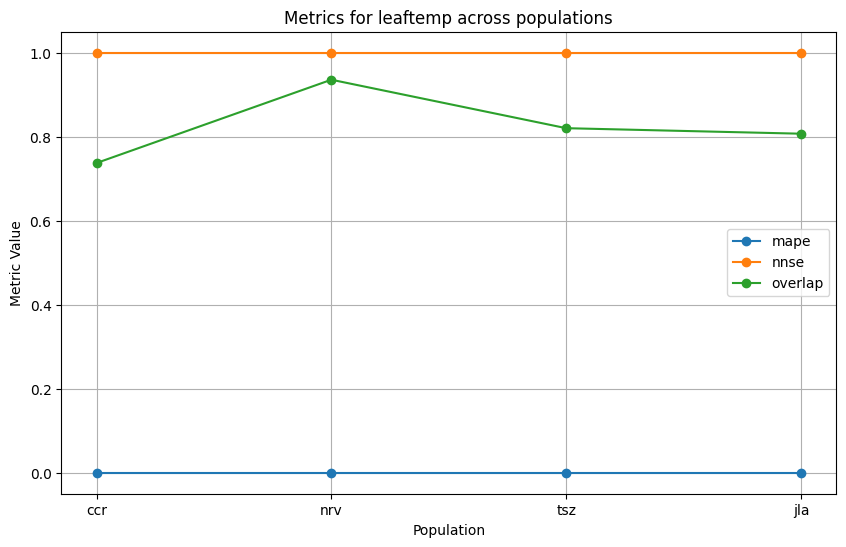

In [474]:
metrics_to_plot = ['mape', 'nnse', 'overlap']
populations = list(all_fits.keys())

for col in columns:
    plt.figure(figsize=(10, 6))
    for metric in metrics_to_plot:
        values = [all_fits[pop][col][metric] if col in all_fits[pop] else np.nan for pop in populations]
        plt.plot(populations, values, marker='o', label=metric)
    plt.title(f"Metrics for {col} across populations")
    plt.xlabel("Population")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    # plt.savefig(f"{col}.png")

In [475]:
def plot_errors(fits, metrics_to_plot, columns):
    populations = list(all_fits.keys())
    # Prepare data for seaborn catplot
    plot_data = []
    for metric in metrics_to_plot:
        for var in columns:
            for pop in populations:
                value = fits[pop][var][metric] if var in fits[pop] else np.nan
                plot_data.append({
                    "Metric": metric,
                    "Variable": var,
                    "Population": pop,
                    "Value": value
                })
    plot_df = pd.DataFrame(plot_data)

    colors = {
        'ccr': "#fa6363",      # light red
        'nrv': "#fbc454",     # light orange
        'tsz': "#658bff",    # light blue
        'jla': "#ae79ff"     # light purple
    }

    # Faceted barplot: one facet per metric, hue as population
    g = sns.catplot(
        data=plot_df,
        x="Variable",
        y="Value",
        hue="Population",
        col="Metric",
        kind="bar",
        height=6,
        aspect=1,
        palette=colors
    )
    

    for ax in g.axes.flat:
        ax.yaxis.grid(True, linestyle='--', alpha=0.5)
        ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.4)

    # Set custom titles for each metric facet
    metric_titles = {
        "mape": "Mean Absolute Percentage Error (MAPE)",
        "nnse": "Normalized Nash-Sutcliffe Efficiency (NNSE)",
        "overlap": "Prediction-Ground 95% CI Overlap"
    }
    for ax, metric in zip(g.axes.flat, g.col_names):
        ax.set_title(f"{metric} for outputs optimized on {optim_var}")
    g.set_axis_labels("Variable", "Metric Value")
    g._legend.set_bbox_to_anchor((1.0, 0.5))
    g._legend.set_loc("center left")
    plt.tight_layout()
    plt.show()

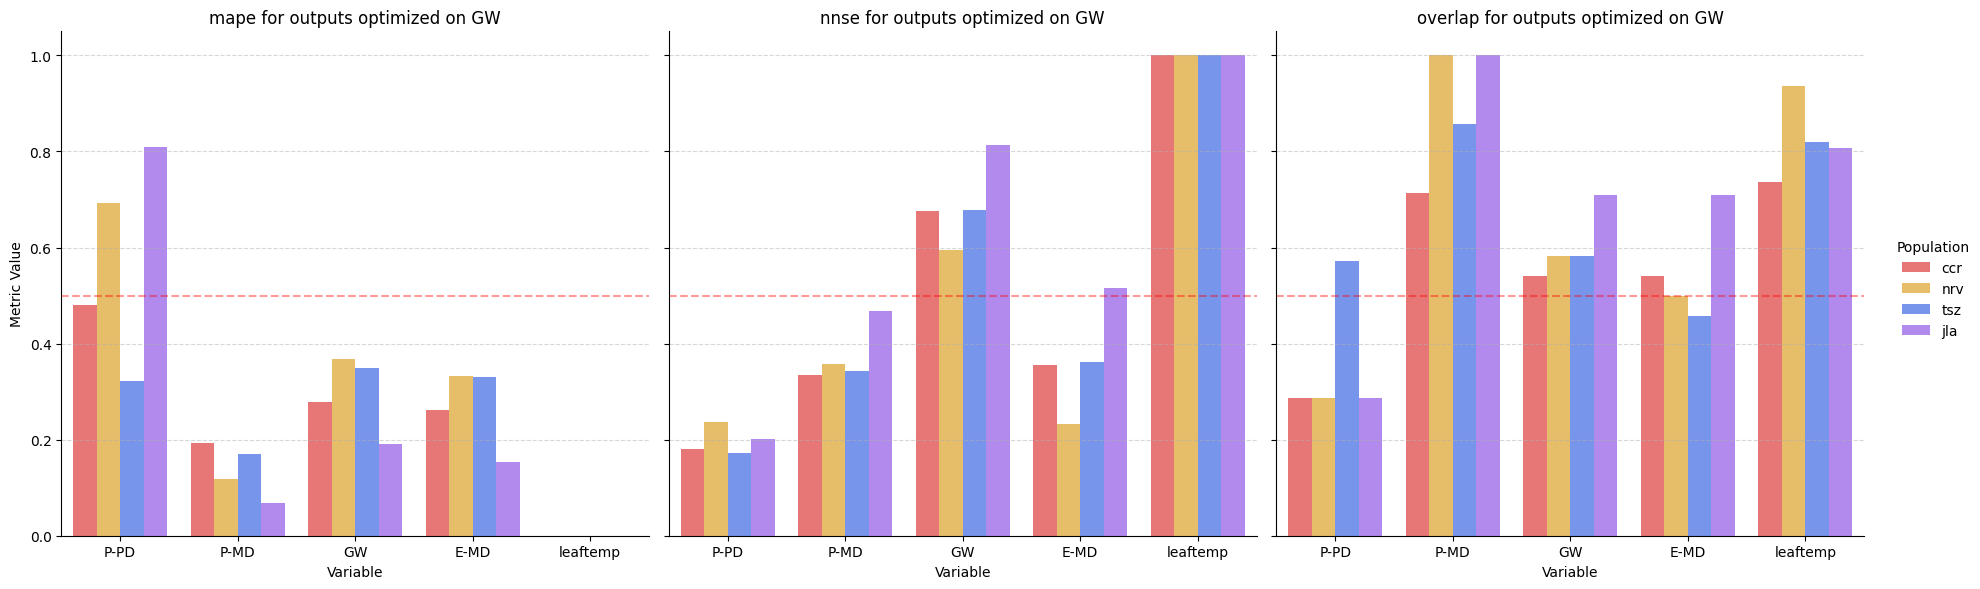

In [476]:
plot_errors(all_fits, metrics_to_plot, columns)

## Plots of prediction against ground truth

In [477]:
def get_errors(ground, stderr):
    # Get error bar
    # col_ground_stderr has the same stderr across multiple timesteps, which showcases the xerr
    # Calculate xerr as the length of consecutive identical stderr values divided by 2
    stderr_values = stderr.values
    xerr = np.zeros((2, len(ground)))
    yerr = np.zeros_like(ground)
    if len(stderr_values) > 0:
        start_idx = 0
        err_idx = 0

        # Iterate through values
        while start_idx < len(stderr_values):
            
            # Get current val and set as yerr
            current_val = stderr_values[start_idx]
            yerr[err_idx] = current_val
            run_length = 1

            # Find the number of consecutive errors
            while (start_idx + run_length < len(stderr_values)) and (stderr_values[start_idx + run_length] == current_val):
                run_length += 1

            # Get the middle and determine left and right bounds from middle and run_length
            mid = (run_length + 1) / 2
            xerr[:, err_idx] = np.array([max(0, mid - 1), max(0, run_length - mid)])
            start_idx += run_length

            # Move to next stderr
            err_idx += 1

    return xerr, yerr

In [478]:
unit = {
    "P-PD" : "-MPa",
    "P-MD" : "-MPa",
    "GW" : "mmol s-1 m-2 (LA)",
    "E-MD" : "mmol s-1 m-2 (LA)",
    "K-plant" : "kg hr-1 m-2 (BA)",
    'leaftemp' : "C"
}

In [479]:
def plot_ground_pred(columns, stop, start=0):
    """
    Ground versus prediction graph with lines across all.

    stop and start are julian days!
    """

    for pop in data.keys():
        print(f"Population: {pop}")
        for col in columns:
            plt.figure(figsize=(12, 6))
            ground_df = data[pop]["ground"]["hourly"]
            stderr_df = data[pop]["ground"]["stderr"]
            pred_df = data[pop]["pred"][optim_var]["main"]
            low_df = data[pop]["pred"][optim_var]["low"]
            high_df = data[pop]["pred"][optim_var]["high"]

            # Filter for valid julian-day range

            ground_df = ground_df[ground_df['julian-day'].between(start, stop)]
            stderr_df = stderr_df[stderr_df['julian-day'].between(start, stop)]
            pred_df = pred_df[pred_df['julian-day'].between(start, stop)]
            low_df = low_df[low_df['julian-day'].between(start, stop)]
            high_df = high_df[high_df['julian-day'].between(start, stop)]

            # Filter ground and stderr for the current column, also align with index
            col_ground = ground_df[col].dropna()
            col_ground_stderr = stderr_df[col].dropna()
            col_pred = pred_df[col]
            col_pred_low = low_df[col]
            col_pred_high = high_df[col]

            # Get error bars
            _, yerr = get_errors(col_ground, col_ground_stderr)

            # Plot ground with error bars
            plt.errorbar(
                col_ground.index,
                col_ground,
                yerr=1.96 * yerr,
                fmt='o',
                alpha=0.6,
                label=f'{pop} Ground 95% CI',
                capsize=5,
                barsabove=True,
                color='navy'
            )

             # Plot prediction
            plt.plot(col_pred.index, col_pred, color="green", alpha=1, label=f'Prediction')
            # plt.fill_between(col_pred.index, col_pred_low, col_pred_high, color="green", alpha=0.4, label=f'Prediction 95%')
            
            plt.ylim(bottom=0)
            plt.title(f"Predicted vs Ground: {col}")
            plt.xlabel("Timestep")
            plt.ylabel(f"{col} {unit.get(col, '')}")
            plt.axvline(
                x=ground_df.index[(ground_df['julian-day'] == stress_begin) & (ground_df['standard-time'] == 0)].item(), 
                color='navy', 
                linestyle='--', 
                label='Pre-stress Cutoff',
                alpha=0.4
            )
            plt.axvline(
                x=ground_df.index[(ground_df['julian-day'] == predrought_cutoff) & (ground_df['standard-time'] == 0)].item(), 
                color='navy', 
                linestyle='--', 
                label='Predrought Cutoff',
                alpha=0.4
            )
            plt.axvline(
                x=ground_df.index[(ground_df['julian-day'] == post_drought) & (ground_df['standard-time'] == 0)].item(), 
                color='navy', 
                linestyle='--', 
                label='Drought Cutoff',
                alpha=0.4
            )
            plt.legend()
            plt.grid(True)
            plt.show()

Population: ccr


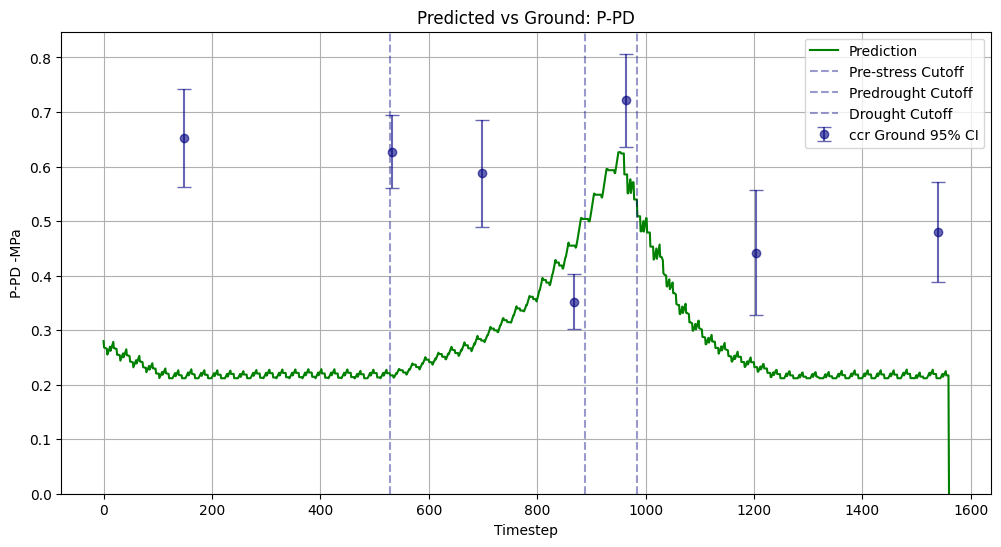

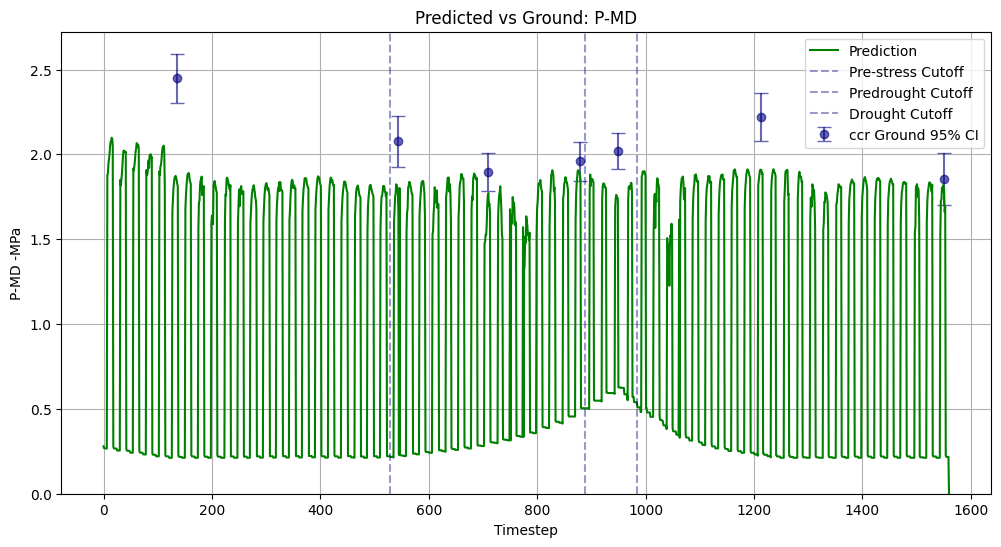

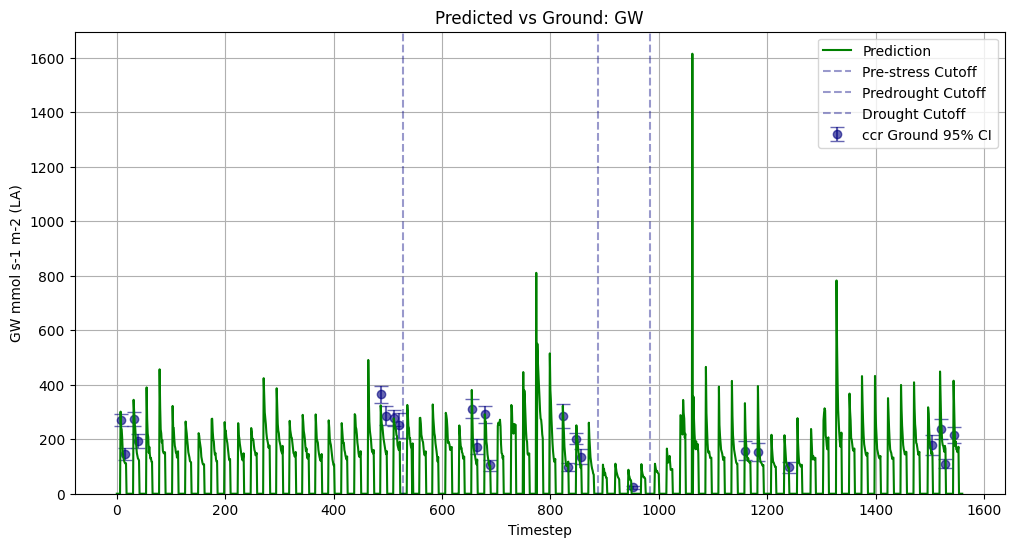

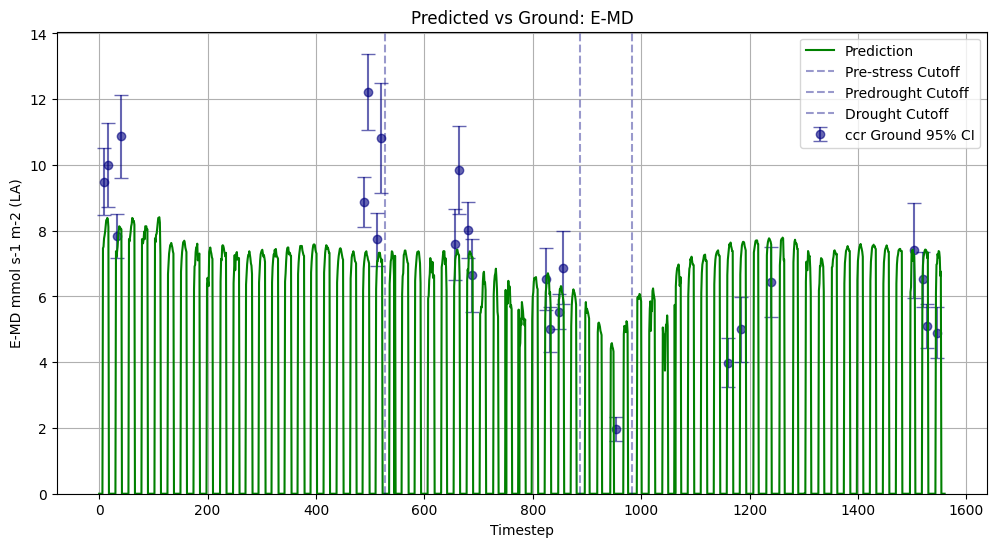

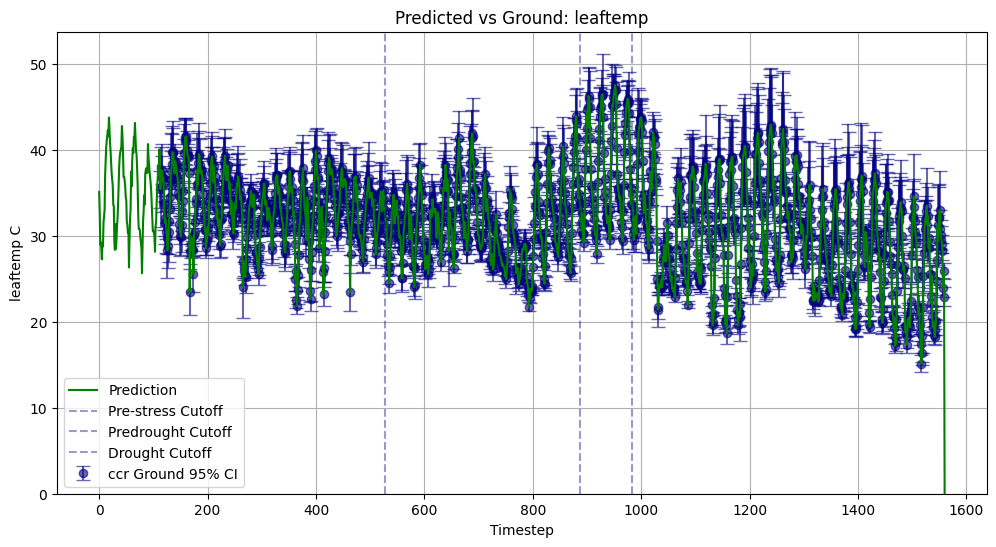

Population: nrv


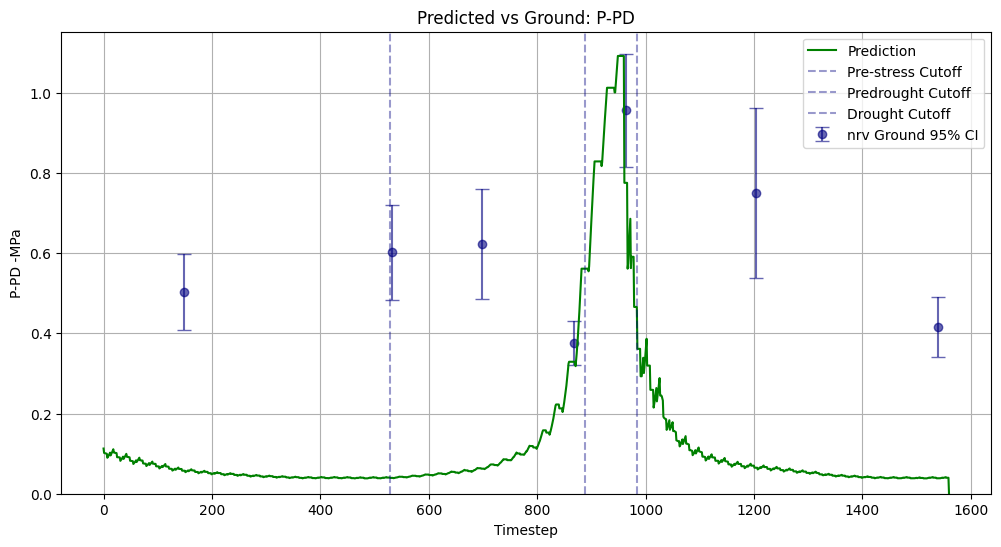

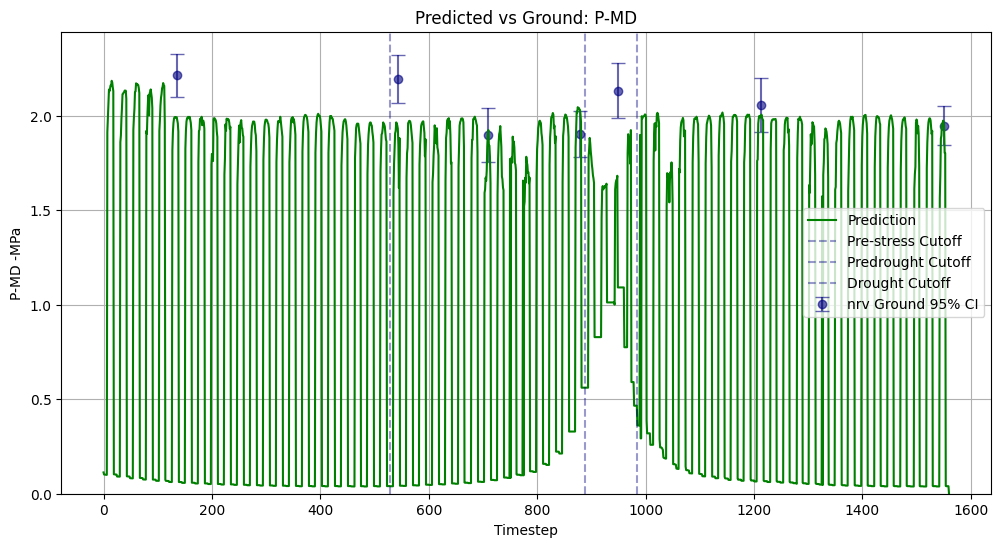

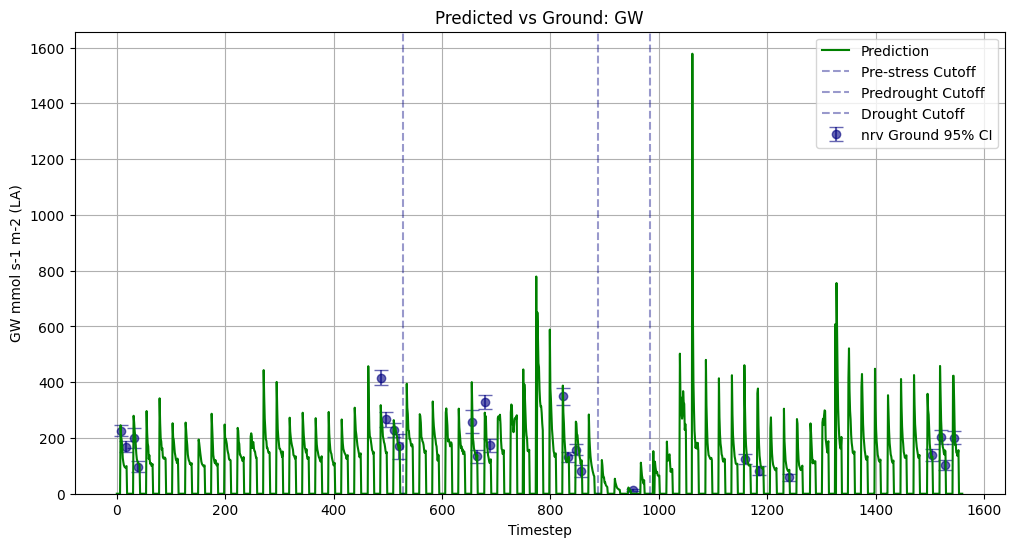

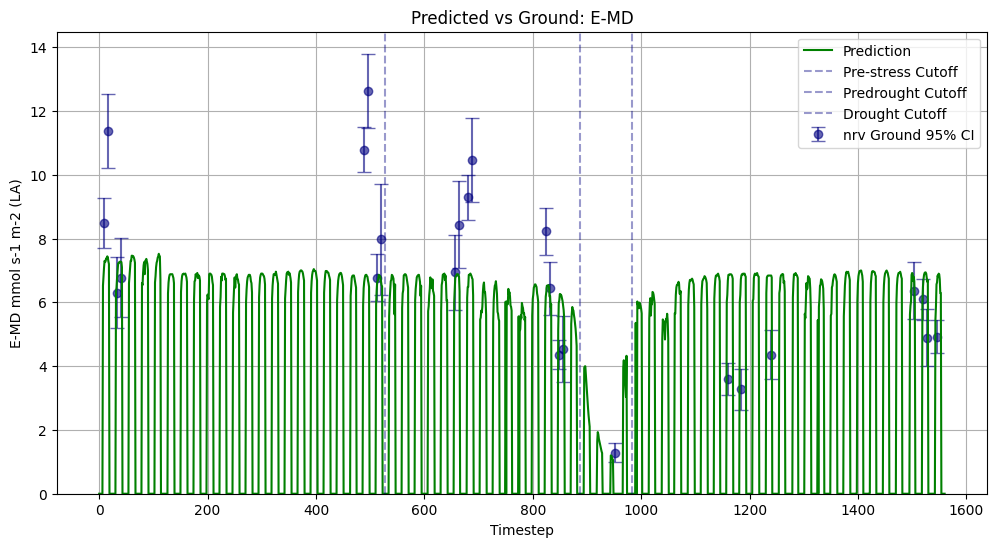

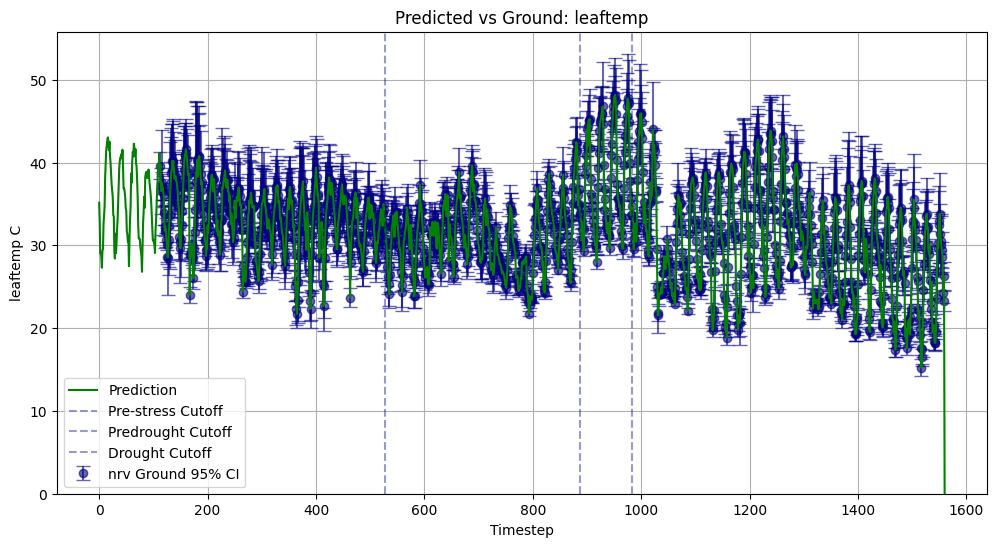

Population: tsz


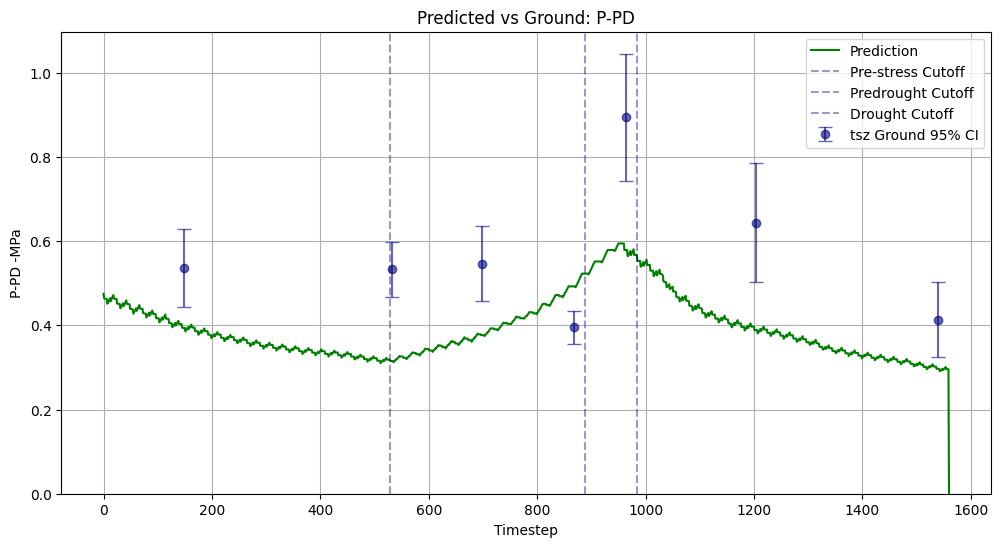

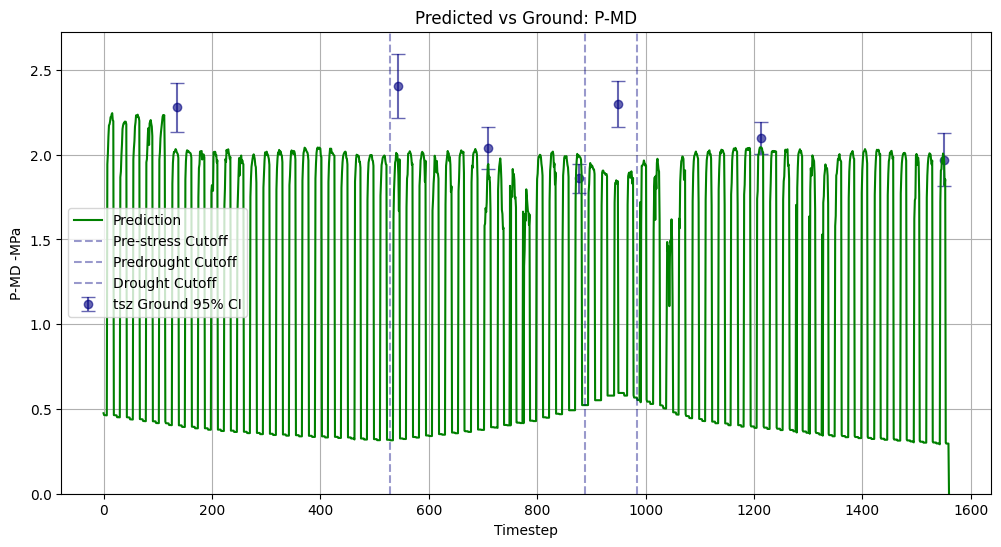

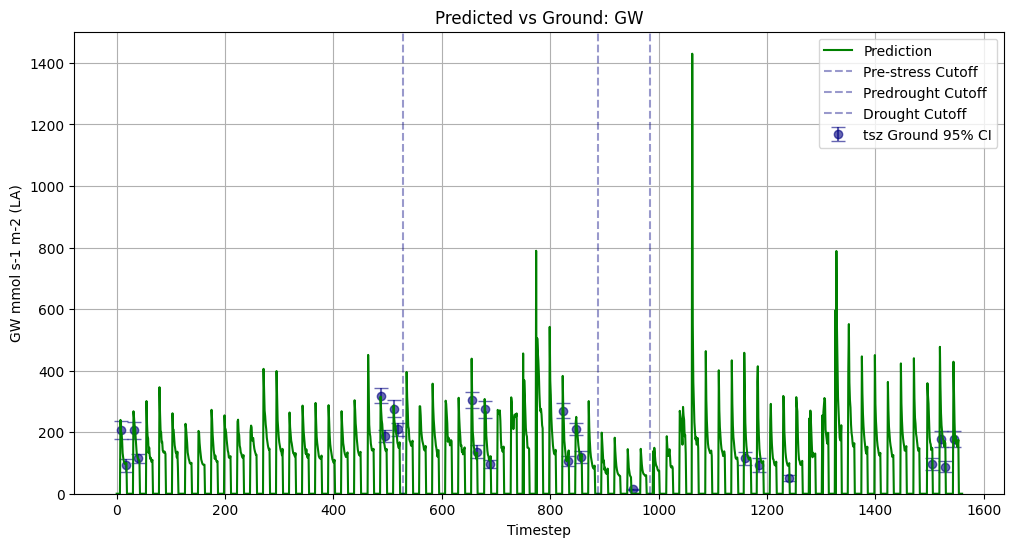

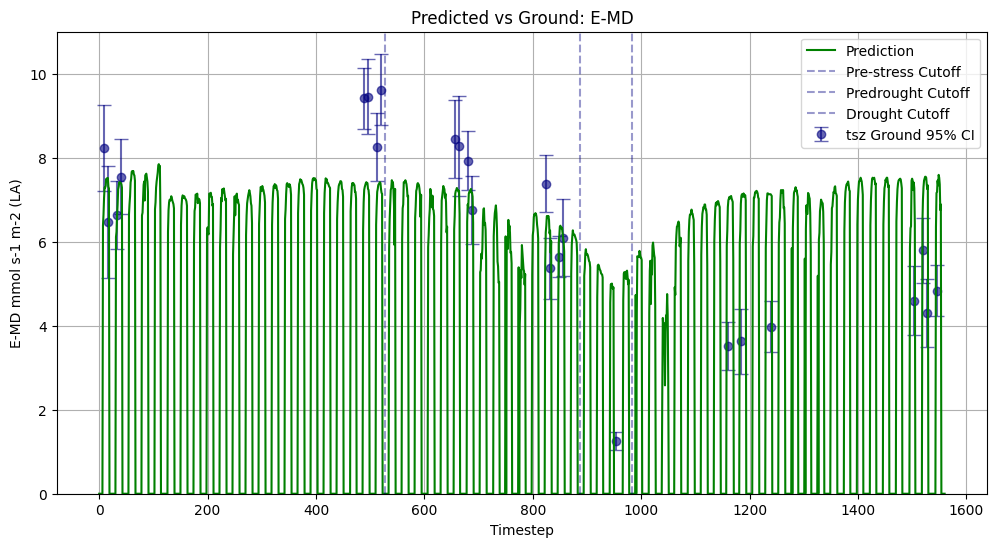

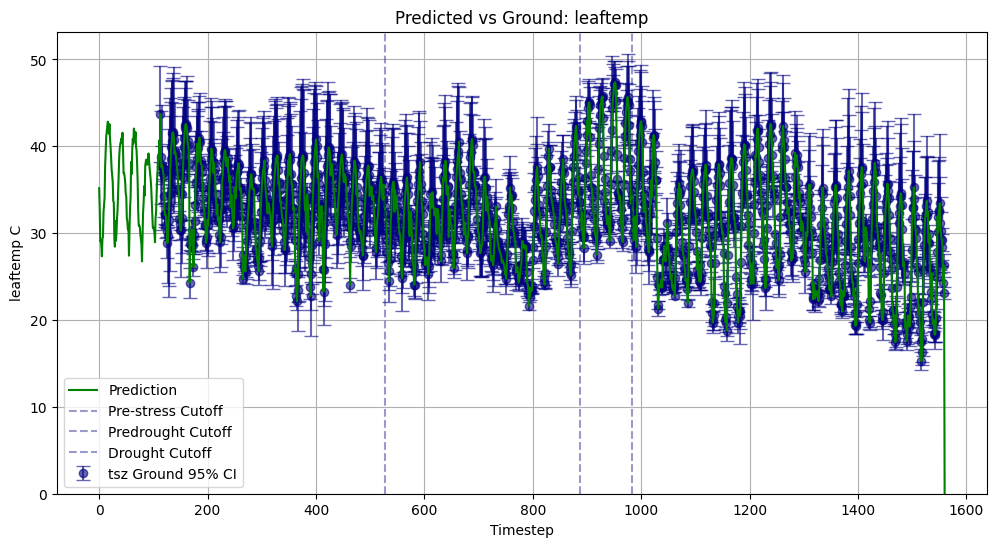

Population: jla


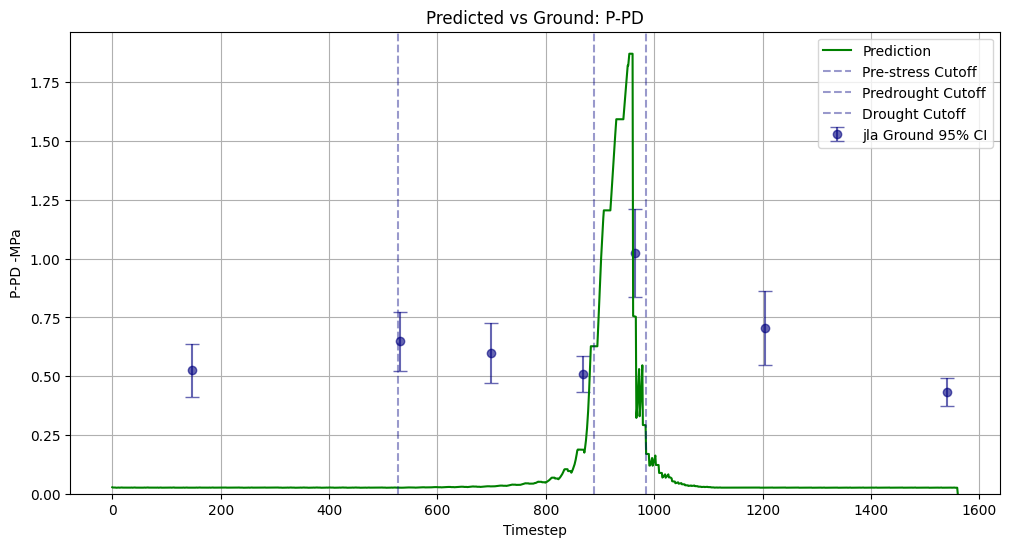

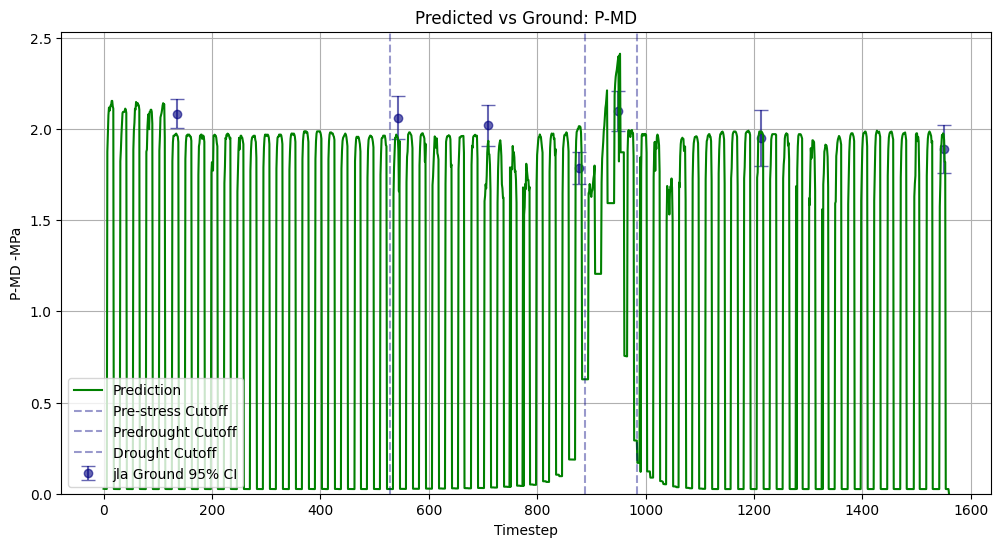

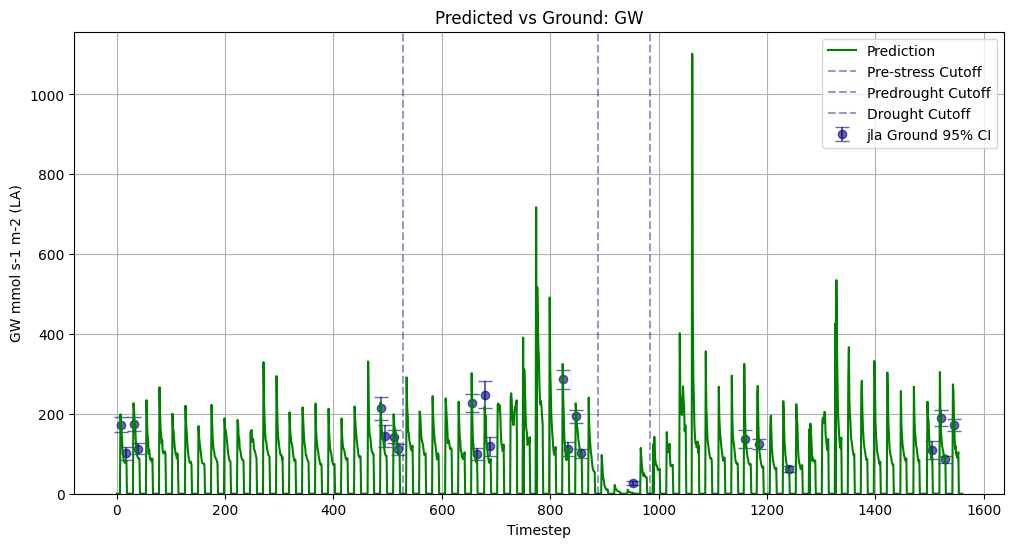

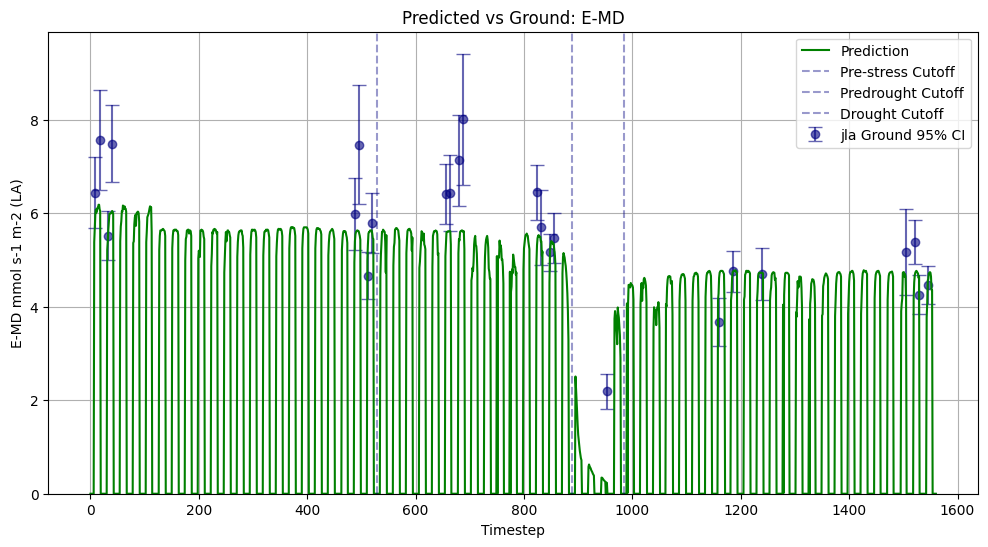

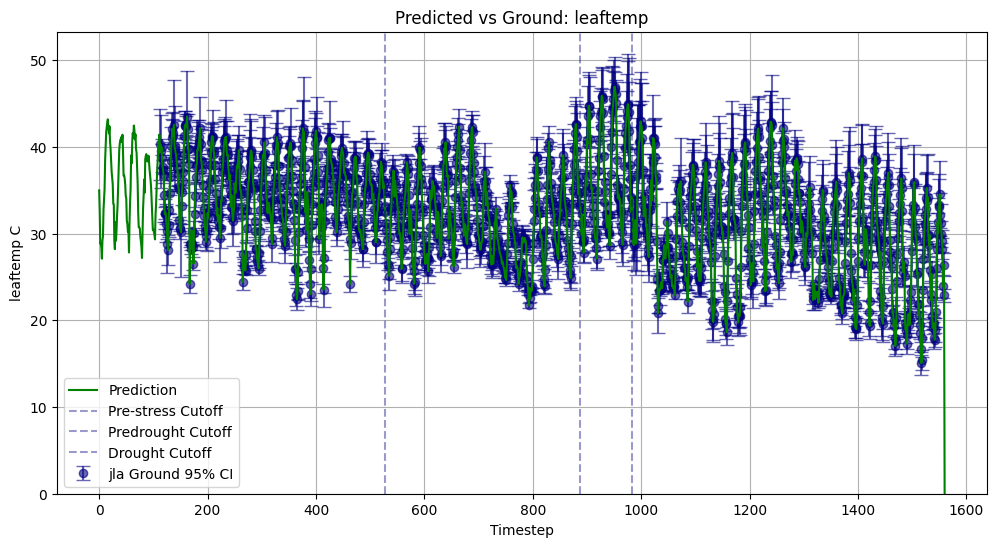

In [480]:
plot_ground_pred(columns, stop=end_day)

In [483]:
def plot_ground_pred_two(columns, stop, start=0):
    """
    Ground versus prediction graph that only outputs for each timestep matching to the ground truth data.

    stop and start are julian days!
    """

    for pop in data.keys():
        print(f"Population: {pop}")
        for col in columns:
            plt.figure(figsize=(12, 6))
            ground_df = data[pop]["ground"]["hourly"]
            stderr_df = data[pop]["ground"]["stderr"]
            pred_df = data[pop]["pred"][optim_var]["main"]
            low_df = data[pop]["pred"][optim_var]["low"]
            high_df = data[pop]["pred"][optim_var]["high"]

            # Filter for valid julian-day range
            ground_df = ground_df[ground_df['julian-day'].between(start, stop)]
            stderr_df = stderr_df[stderr_df['julian-day'].between(start, stop)]
            pred_df = pred_df[pred_df['julian-day'].between(start, stop)]
            low_df = low_df[low_df['julian-day'].between(start, stop)]
            high_df = high_df[high_df['julian-day'].between(start, stop)]

            # Filter ground and stderr for the current column
            col_ground = ground_df[col].dropna()
            col_ground_stderr = stderr_df[col].dropna()
            col_pred = pred_df[col].loc[col_ground.index]
            col_pred_low = low_df[col].loc[col_ground.index]
            col_pred_high = high_df[col].loc[col_ground.index]

            # Align prediction with ground index
            col_pred = col_pred.loc[col_ground.index]

            # Plot prediction
            # Calculate asymmetric yerr for prediction
            yerr_upper = abs(col_pred_high - col_pred)
            yerr_lower = abs(col_pred - col_pred_low)
            yerr_pred = [yerr_lower.values, yerr_upper.values]

            plt.errorbar(
                col_pred.index,
                col_pred,
                yerr=yerr_pred,
                fmt='^',
                alpha=1,
                label=f'{pop} Prediction',
                color="green",
                capsize=5
            )

            # Get error bars
            _, yerr = get_errors(col_ground, col_ground_stderr)

            # Plot ground with error bars
            plt.errorbar(
                col_ground.index,
                col_ground,
                yerr=1.96 * yerr,
                fmt='o',
                alpha=0.6,
                label=f'{pop} Ground',
                capsize=5,
                barsabove=True,
                color='navy'
            )
            
            plt.ylim(bottom=0)
            plt.xlim(left=0, right=1600)
            plt.title(f"Predicted vs Ground: {col}")
            plt.xlabel("Timestep")
            plt.ylabel(f"{col} {unit.get(col, '')}")

            stress_idx = ground_df.index[(ground_df['julian-day'] == stress_begin) & (ground_df['standard-time'] == 0)].item()
            drought_idx = ground_df.index[(ground_df['julian-day'] == predrought_cutoff) & (ground_df['standard-time'] == 0)].item()
            post_idx = ground_df.index[(ground_df['julian-day'] == post_drought) & (ground_df['standard-time'] == 0)].item()

            # Shade pre-stress region
            # plt.axvspan(
            #     ground_df.index.min(),
            #     stress_idx,
            #     color='navy',
            #     alpha=0.1,
            #     label='Pre-stress Region'
            # )
            # Shade predrought region
            plt.axvspan(
                stress_idx,
                drought_idx,
                color='orange',
                alpha=0.2,
                label='Predrought'
            )
            # Shade drought region
            plt.axvspan(
                drought_idx,
                post_idx,
                color='red',
                alpha=0.2,
                label='Drought'
            )
            # plt.axvspan(
            #     drought_idx,
            #     1600,
            #     color='navy',
            #     alpha=0.1,
            #     label='Post-drought Region'
            # )
            plt.legend()
            plt.show()
            # plt.savefig(f"{pop}_{col}.png")

Population: ccr


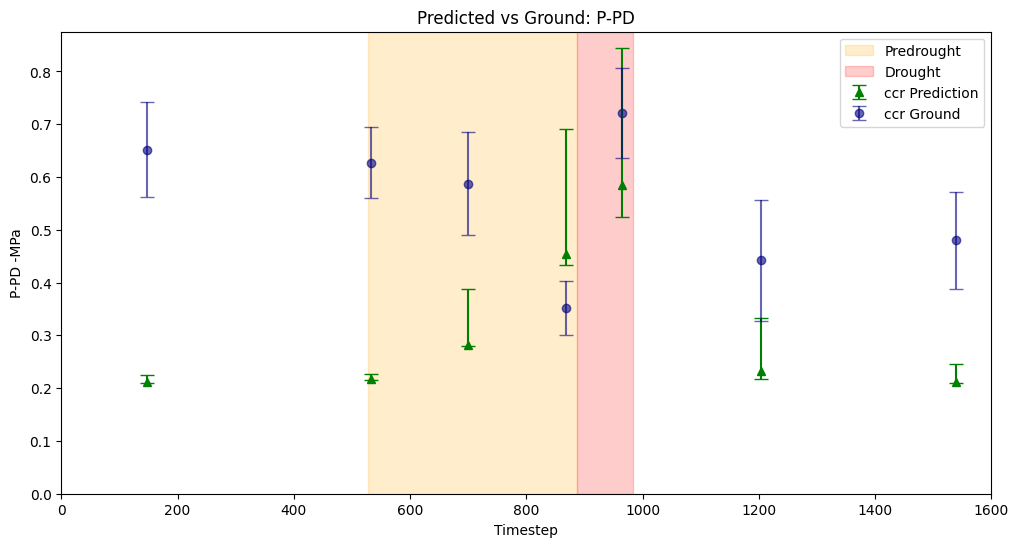

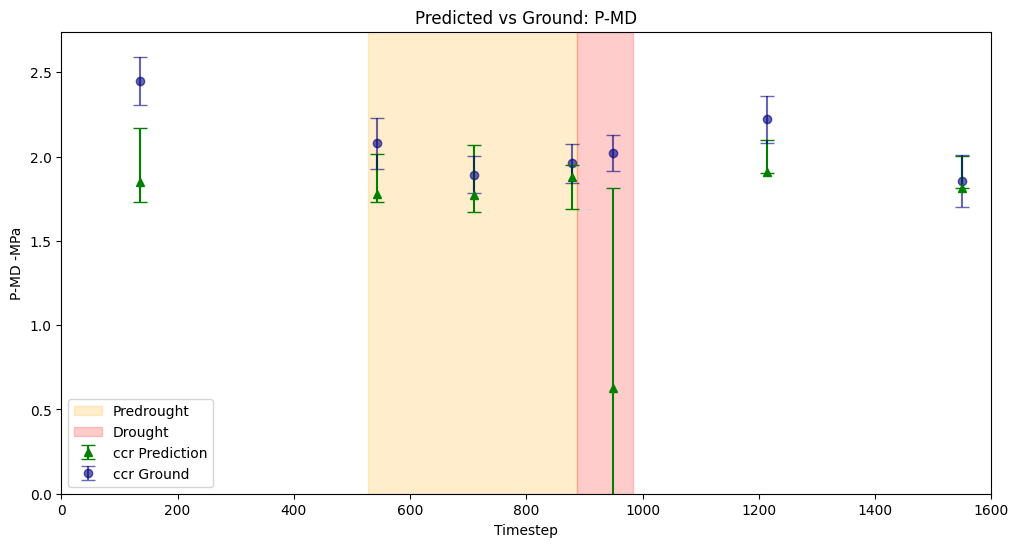

Population: nrv


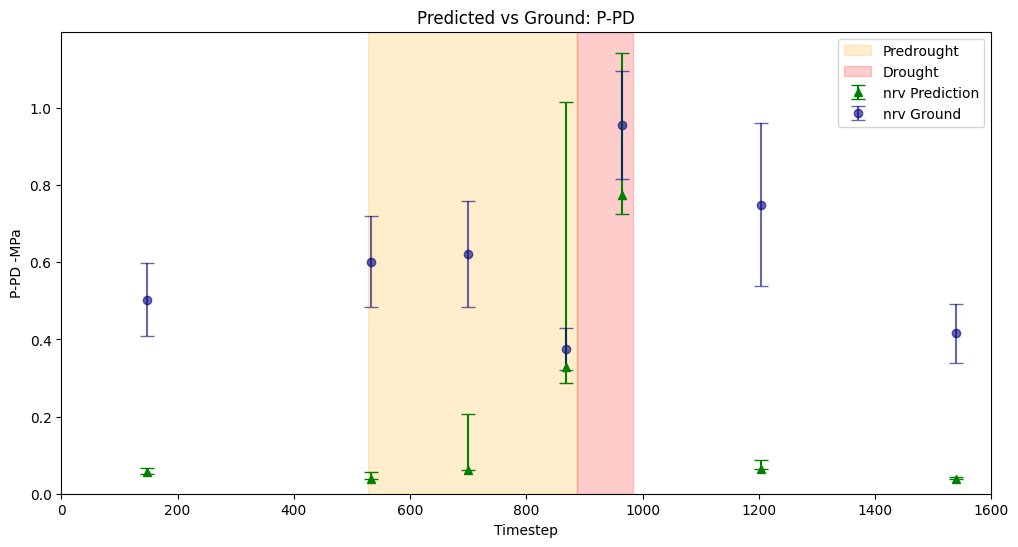

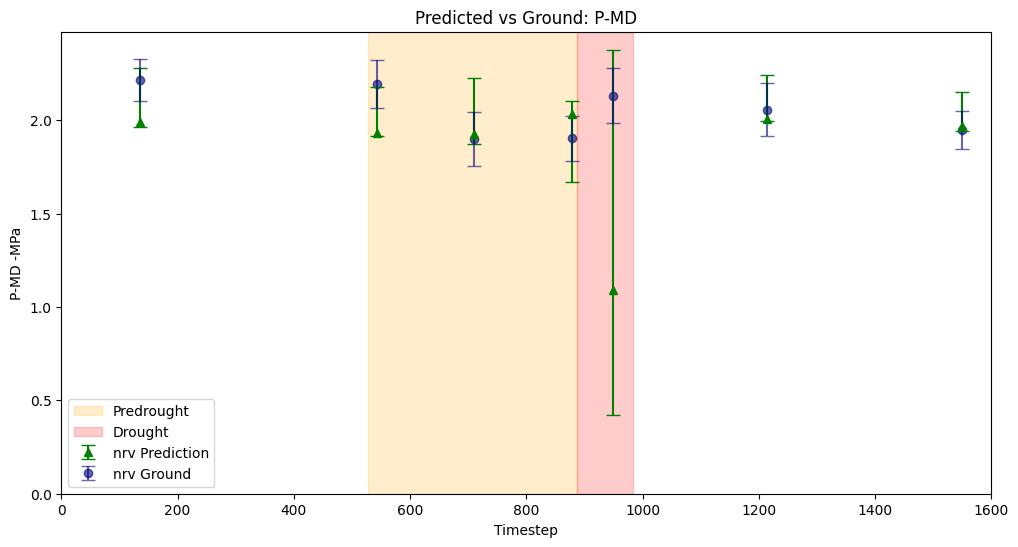

Population: tsz


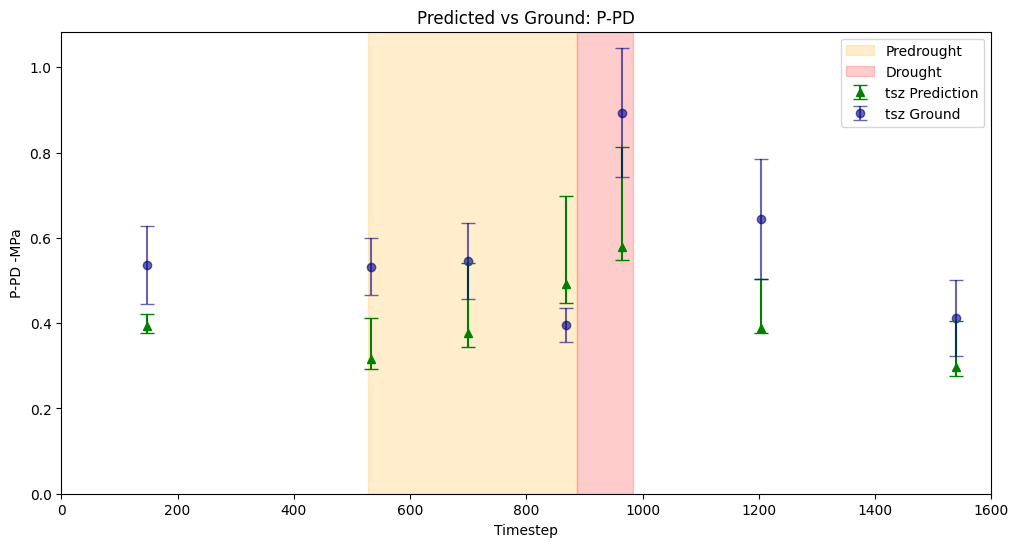

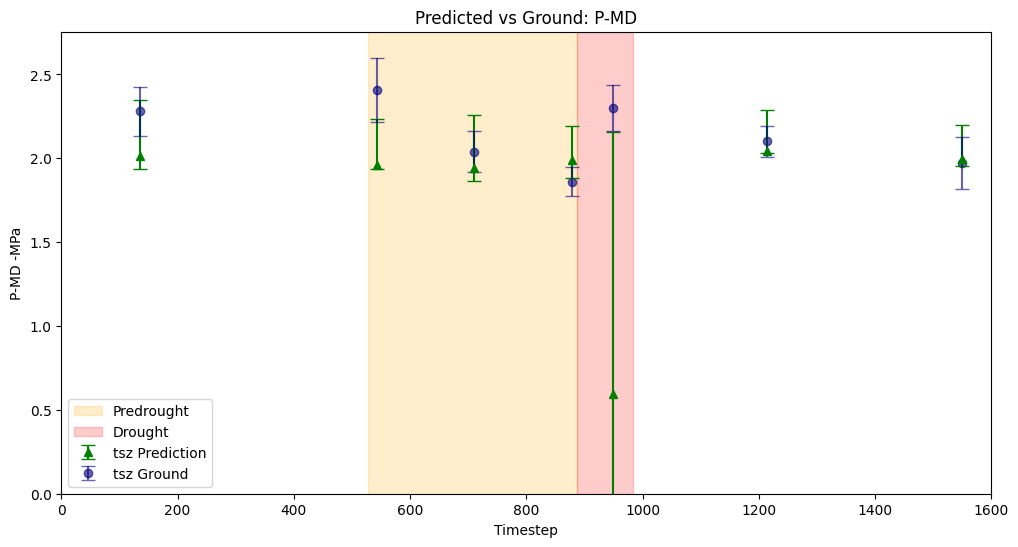

Population: jla


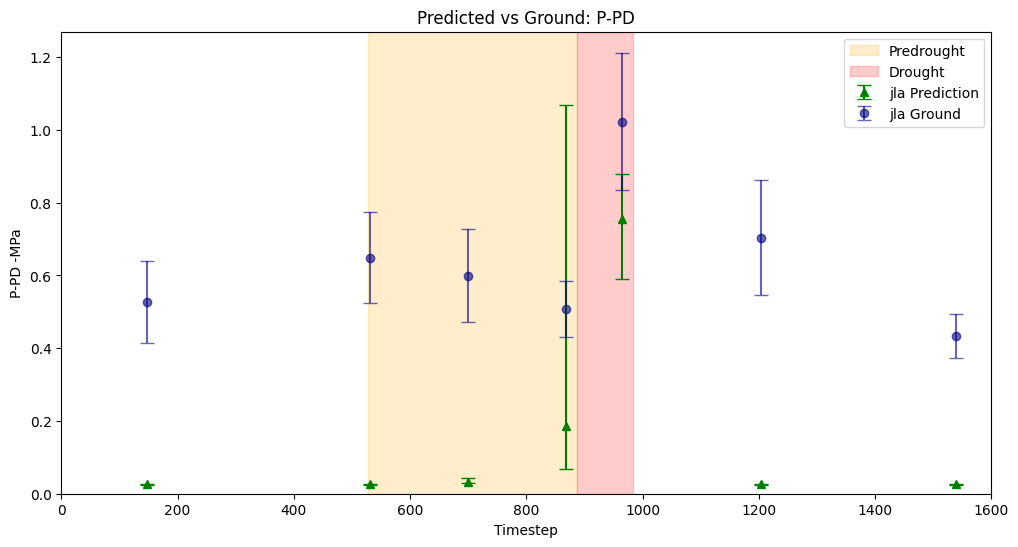

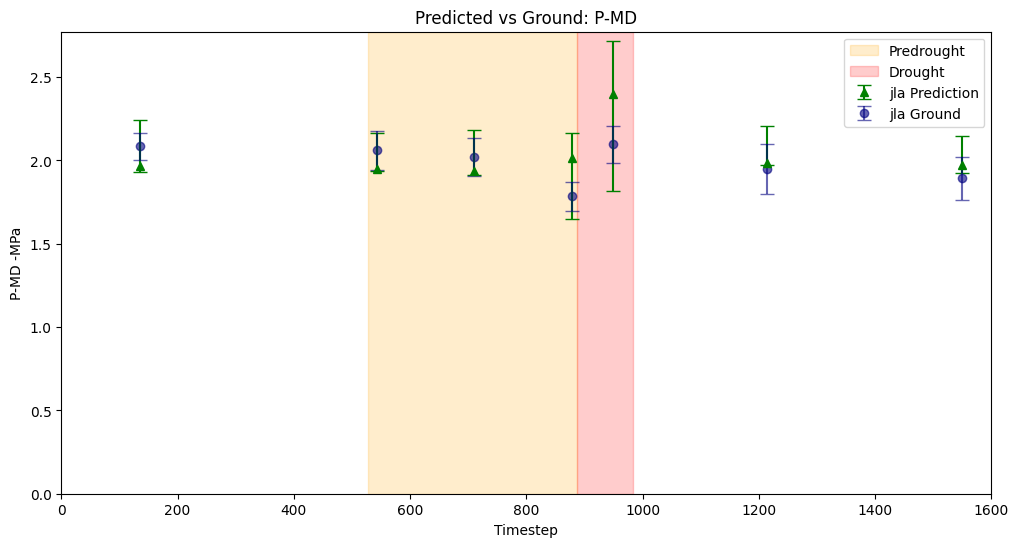

In [484]:
plot_ground_pred_two(["P-PD", "P-MD"], stop=end_day)

In [485]:
# plot_ground_pred(columns, stop=end_day)

## Pred vs ground truth averaged across treatments

In [486]:
# Treatments and their corresponding start and end julian-days
treatments = { 
    "Pre-water stress": (201, 237),
    "Water stress": (238, 241),
    "Post-water stress": (242, 265),
}

In [487]:
def plot_treatment_averages():
    """
    Create plots showing averaged ground truth and predictions for each treatment period
    across all populations, similar to the reference figure.
    """
    
    # Variables to plot
    variables = ["GW", "E-MD", "leaftemp", "leaf-air"]
    
    # Source elevations for each population (from the reference figure)
    source_elevations = {
        'ccr': 72,
        'nrv': 666,
        'tsz': 1212,
        'jla': 1521,
    }
    
    # Colors for each elevation (matching the reference figure)
    pred_colors = {
        72: 'red',
        666: 'orange', 
        1212: 'blue',
        1521: 'purple'
    }

    ground_colors = {
        72: '#ff9999',      # light red
        666: '#ffd580',     # light orange
        1212: '#99b3ff',    # light blue
        1521: '#c299ff'     # light purple
    }
    
    # Markers for each elevation
    markers = {
        72: 'D',
        666: 's',
        1212: 'o', 
        1521: '^'
    }

    for var in variables:
        
        plt.figure(figsize=(10, 6))
        
        treatment_names = list(treatments.keys())
        x_pos = np.arange(len(treatment_names))
    
        # For each population
        for pop in data.keys():
            elevation = source_elevations[pop]
            ground_color = ground_colors[elevation]
            pred_color = pred_colors[elevation]
            marker = markers[elevation]
            
            if var == 'GW' or var == 'E-MD':
                ground_df = data[pop]["ground"]["gw_treatment_averages"]
            elif var == 'leaftemp':
                ground_df = data[pop]["ground"]["leaft_treatment_averages"]
            elif var == 'leaf-air':
                ground_df = data[pop]["ground"]["leaf-air_treatment_averages"]

            pred_df = data[pop]["pred"][optim_var]["main"]
            pred_low_df = data[pop]["pred"][optim_var]["low"]
            pred_high_df = data[pop]["pred"][optim_var]["high"]

            pred_df['leaf-air'] = pred_df['leaftemp'] - pred_df['T-air']
            pred_low_df['leaf-air'] = pred_low_df['leaftemp'] - pred_low_df['T-air']
            pred_high_df['leaf-air'] = pred_high_df['leaftemp'] - pred_high_df['T-air']
            
            ground_means = []
            ground_errors = []
            pred_means = []
            yerr_pred_means = [[],[]]
            
            # Calculate means for each treatment period
            for treatment, (start_day, end_day) in treatments.items():
                # Filter data for treatment period to be between 15:00 and 17:00 like ground truth
                treatment_pred = pred_df[
                    (pred_df['julian-day'].between(start_day, end_day)) &
                    (pred_df['standard-time'] >= 15) &
                    (pred_df['standard-time'] <= 17)
                ][var]
                treatment_pred_low = pred_low_df[
                    (pred_low_df['julian-day'].between(start_day, end_day)) &
                    (pred_low_df['standard-time'] >= 15) &
                    (pred_low_df['standard-time'] <= 17)
                ][var]
                treatment_pred_high = pred_high_df[
                    (pred_high_df['julian-day'].between(start_day, end_day)) &
                    (pred_high_df['standard-time'] >= 15) &
                    (pred_high_df['standard-time'] <= 17)
                ][var]

                yerr_upper = treatment_pred_high - treatment_pred
                yerr_lower = treatment_pred - treatment_pred_low
                yerr_pred_means[0].append(yerr_lower.mean())
                yerr_pred_means[1].append(yerr_upper.mean())
                    
                pred_mean = treatment_pred.mean() if len(treatment_pred) > 0 else np.nan
                pred_means.append(pred_mean)

                # Select the average and stderr for the current treatment and variable
                ground_mean = ground_df.loc[ground_df['treatment'] == treatment][f'{var}_avg'].values[0]
                ground_stderr = ground_df.loc[ground_df['treatment'] == treatment][f'{var}_stderr'].values[0]
                ground_means.append(ground_mean)
                ground_errors.append(ground_stderr)

            offset = 0.1 * (list(data.keys()).index(pop) - 1.5)  # Center around 0

            # Plot ground truth with error bars
            plt.errorbar(
                x_pos + offset, 
                ground_means, 
                yerr=[1.96 * err for err in ground_errors], 
                fmt=marker, 
                color=ground_color, 
                markersize=8, 
                capsize=10,
                capthick=1,
                label=f'{elevation}'
            )
            
            # Plot predictions
            plt.errorbar(
                x_pos + offset, 
                pred_means, 
                yerr=yerr_pred_means, 
                fmt='x', 
                color=pred_color, 
                markersize=10, 
                linewidth=2, 
                capsize=10, 
                label=None
            )
        
        # Customize plot
        plt.ylabel(f'Afternoon {var} ({unit.get(var, "")})')
        plt.xlabel('Treatment')
        plt.title(f'Treatment Averages: {var} when optimized on {optim_var}')
        plt.xticks(x_pos, treatment_names)
        plt.grid(True, alpha=0.3)
        
        # Add legend
        plt.legend(title='Source elevation (m)', bbox_to_anchor=(1.005, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

ValueError: 'yerr' must not contain negative values

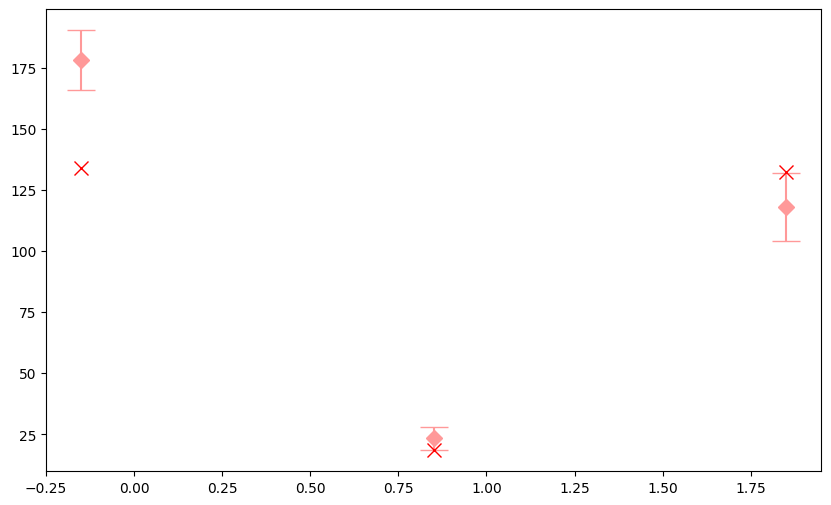

In [488]:
plot_treatment_averages()

## Leaf temperature

Averaged between 14:00 and 18:00

In [ ]:
def get_overlap_perc_leaft(ground, ground_stderr, pred, pred_stderr, start, end):

    col_ground = ground.loc[start:end]
    col_ground_stderr = ground_stderr.loc[start:end]
    col_ground_low = col_ground - 1.96 * col_ground_stderr
    col_ground_high = col_ground + 1.96 * col_ground_stderr
    
    col_pred = pred.loc[start:end]
    col_pred_stderr = pred_stderr.loc[start:end]
    col_pred_low = col_pred - 1.96 * col_pred_stderr
    col_pred_high = col_pred + 1.96 * col_pred_stderr

    # Compute overlap: intervals [col_ground_low, col_ground_high] and [col_pred_low, col_pred_high]
    overlap_count = 0
    total = len(col_ground)
    for i in range(total):
        g_low = col_ground_low.iloc[i]
        g_high = col_ground_high.iloc[i]
        p_low = col_pred_low.iloc[i]
        p_high = col_pred_high.iloc[i]
        # Check if intervals overlap
        if (g_low <= p_high) and (p_low <= g_high):
            overlap_count += 1
    overlap_perc = overlap_count / total if total > 0 else np.nan

    return overlap_perc

In [ ]:
def cmp_leaftemp_pred_to_ground_metrics(ground, ground_stderr, pred, pred_stderr, start, end):
        
    col_ground = ground.loc[start:end]
    col_pred = pred.loc[start:end]

    mse = mean_squared_error(col_ground, col_pred)
    rmse = root_mean_squared_error(col_ground, col_pred)
    mape = mean_absolute_percentage_error(col_ground, col_pred)
    made = median_absolute_error(col_ground, col_pred)
    mae = mean_absolute_error(col_ground, col_pred)
    r2 = r2_score(col_ground, col_pred)
    r2 = 0 if r2 < 0 else r2
    nnse = normalized_nash_sutcliffe_efficiency(col_ground, col_pred)
    overlap = get_overlap_perc_leaft(ground, ground_stderr, pred, pred_stderr, start, end)

    fit = {
        'mse' : mse,
        'rmse' : rmse,
        'mape' : mape,
        'made' : made,
        'mae': mae,
        'r2' : r2,
        'nnse' : nnse,
        'overlap': overlap
    }

    return fit

In [ ]:
leaft_fits = defaultdict(dict)

for pop in data.keys():
    print(f"Population: {pop}")
    leaft = data[pop]["ground"]["leaft"]
    pred = data[pop]["pred"][optim_var]["main"]
    low = data[pop]["pred"][optim_var]["low"]
    high = data[pop]["pred"][optim_var]["high"]

    title_map = {
        'leaftemp': "leaf temperature"
    }
    

    """ From Posch et al.
    Mean Tleaf calculated as average of Tleaf measured at 15 min intervals between 14:00 to 18:00
    each day in three pseudoreplicate leaves per tree, and three replicate trees per population. (B) The difference between Tleaf and air temperature (Tair) was also
    calculated for the same period.
    """
    daily_ground_leaft_mean = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].mean()
    daily_pred_leaft_mean = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].mean()
    daily_low_leaft_mean = low[(low['standard-time'] >= 14) & (low['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].mean()
    daily_high_leaft_mean = high[(high['standard-time'] >= 14) & (high['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].mean()

    # Calculate daily mean of (leaftemp - T-air) for ground and predictions, 14:00-18:00
    daily_ground_diff_mean = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['Tair_C']).mean(), include_groups=False)
    daily_pred_diff_mean = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['T-air']).mean(), include_groups=False)
    daily_low_diff_mean = low[(low['standard-time'] >= 14) & (low['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['T-air']).mean(), include_groups=False)
    daily_high_diff_mean = high[(high['standard-time'] >= 14) & (high['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['T-air']).mean(), include_groups=False)

    daily_pred_leaft_count = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].count()
    daily_pred_leaft_std = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].std()
    daily_pred_leaft_stderr = daily_pred_leaft_std / np.sqrt(daily_pred_leaft_count)

    daily_ground_leaft_count = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].count()
    daily_ground_leaft_std = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day')['leaftemp'].std()
    daily_ground_leaft_stderr = daily_ground_leaft_std / np.sqrt(daily_ground_leaft_count)

    daily_pred_diff_count = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: df['leaftemp'].count(), include_groups=False)
    daily_pred_diff_std = pred[(pred['standard-time'] >= 14) & (pred['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['T-air']).std(), include_groups=False)
    daily_pred_diff_stderr = daily_pred_diff_std / np.sqrt(daily_pred_diff_count)

    daily_ground_diff_count = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: df['leaftemp'].count(), include_groups=False)
    daily_ground_diff_std = leaft[(leaft['standard-time'] >= 14) & (leaft['standard-time'] <= 18)].groupby('julian-day').apply(lambda df: (df['leaftemp'] - df['Tair_C']).std(), include_groups=False)
    daily_ground_diff_stderr = daily_ground_diff_std / np.sqrt(daily_ground_diff_count)

    plt.figure(figsize=(12,4))

    # Shade pre-stress region
    # plt.axvspan(
    #     start_day,
    #     stress_begin,
    #     color='navy',
    #     alpha=0.1,
    #     label='Pre-stress Region'
    # )
    # Shade predrought region
    plt.axvspan(
        stress_begin,
        predrought_cutoff,
        # color='orange',
        alpha=0.3,
        label='Stress Begins',
        facecolor='none', edgecolor='orange', hatch='///'
    )
    # Shade drought region
    plt.axvspan(
        predrought_cutoff,
        post_drought,
        # color='red',
        alpha=0.3,
        label='Drought',
        facecolor='none', edgecolor='red', hatch='xxx'
    )
    # plt.axvspan(
    #     post_drought,
    #     end_day,
    #     color='navy',
    #     alpha=0.1,
    #     label='Post-drought Region'
    # )

    plt.plot(daily_ground_leaft_mean.index, daily_ground_leaft_mean.values, color="navy", alpha=1, label=f'Measured')
    plt.fill_between(daily_ground_leaft_stderr.index, daily_ground_leaft_mean.values - 1.96 * daily_ground_leaft_stderr.values, daily_ground_leaft_mean.values + 1.96 * daily_ground_leaft_stderr.values, color='navy', alpha=0.4)

    plt.plot(daily_pred_leaft_mean.index, daily_pred_leaft_mean.values, color="green", alpha=1, label=f'Predicted')
    plt.fill_between(daily_pred_leaft_stderr.index, daily_pred_leaft_mean.values - 1.96 * daily_pred_leaft_stderr.values, daily_pred_leaft_mean.values + 1.96 * daily_pred_leaft_stderr.values, color='green', alpha=0.4)
    # plt.fill_between(daily_high_leaft_mean.index, daily_low_leaft_mean.values, daily_high_leaft_mean.values, color='green', alpha=0.4, label="95% Interval")

    plt.xlabel("Date")
    plt.ylabel("Leaf temperature C")

    # Generate date labels from July 24th to September 25th
    start_date = datetime(2023, 7, 24)
    end_date = datetime(2023, 9, 25)
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Set x-ticks at the corresponding julian-day indices
    julian_days = daily_ground_diff_mean.index
    tick_indices = []
    tick_labels = []
    for i, date in enumerate(date_range):
        if i % 7 != 0:
            continue
        jd = date.timetuple().tm_yday
        if jd in julian_days:
            tick_indices.append(jd)
            tick_labels.append(date.strftime('%b %d'))

    plt.ylim(bottom=25, top=50)
    plt.xticks(tick_indices, tick_labels, rotation=45)
    plt.title(f"Predicted leaf temperature for {pop}")
    plt.legend()

    # plt.xlim(start_day, predrought_cutoff)
    plt.show()

    plt.figure(figsize=(12,4))
    # Shade pre-stress region
    # plt.axvspan(
    #     start_day,
    #     stress_begin,
    #     color='navy',
    #     alpha=0.1,
    #     label='Pre-stress Region'
    # )
    # Shade predrought region
    plt.axvspan(
        stress_begin,
        predrought_cutoff,
        # color='orange',
        alpha=0.3,
        label='Stress Begins',
        facecolor='none', edgecolor='orange', hatch='///'
    )
    # Shade drought region
    plt.axvspan(
        predrought_cutoff,
        post_drought,
        # color='red',
        alpha=0.3,
        label='Drought',
        facecolor='none', edgecolor='red', hatch='xxx'
    )
    # plt.axvspan(
    #     post_drought,
    #     end_day,
    #     color='navy',
    #     alpha=0.1,
    #     label='Post-drought Region'
    # )

    plt.plot(daily_ground_diff_mean.index, daily_ground_diff_mean.values, color="navy", alpha=1, label=f'Measured')
    plt.fill_between(daily_ground_diff_stderr.index, daily_ground_diff_mean.values - 1.96 * daily_ground_diff_stderr.values, daily_ground_diff_mean.values + 1.96 * daily_ground_diff_stderr.values, color='navy', alpha=0.3)

    plt.plot(daily_pred_diff_mean.index, daily_pred_diff_mean.values, color="green", alpha=1, label=f'Predicted', linestyle='--')
    plt.fill_between(daily_pred_diff_stderr.index, daily_pred_diff_mean.values - 1.96 * daily_pred_diff_stderr.values, daily_pred_diff_mean.values + 1.96 * daily_pred_diff_stderr.values, color='green', alpha=0.3)
    # plt.fill_between(daily_high_diff_mean.index, daily_low_diff_mean.values, daily_high_diff_mean.values, color='green', alpha=0.4, label="95% Interval")

    plt.ylim(bottom=-6, top=4)
    plt.xlabel("Date")
    plt.ylabel("Leaf temperature - Air temperature (˚C)")

    # Generate date labels from July 24th to September 25th
    start_date = datetime(2023, 7, 24)
    end_date = datetime(2023, 9, 25)
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Set x-ticks at the corresponding julian-day indices
    julian_days = daily_ground_diff_mean.index
    tick_indices = []
    tick_labels = []
    for i, date in enumerate(date_range):
        if i % 7 != 0:
            continue
        jd = date.timetuple().tm_yday
        if jd in julian_days:
            tick_indices.append(jd)
            tick_labels.append(date.strftime('%b %d'))

    plt.axhline(y=0, color='red', linestyle='--', alpha=0.4)

    plt.xticks(tick_indices, tick_labels, rotation=45)
    # plt.title(f"Predicted difference in leaf temperature versus air temperature for population {pop.upper()} fit on {title_map[optim_var] if optim_var in title_map else optim_var}.")
    # plt.title(f"Predicted difference in leaf temperature versus air temperature fit on {title_map[optim_var] if optim_var in title_map else optim_var}.")
    plt.title(f"Predicted vs. Measured Leaf-Air Temperature Difference (fit on {title_map[optim_var] if optim_var in title_map else optim_var})")
    plt.legend()

    # if pop == 'ccr':
    #     plt.savefig("pred_vs_measured_leaf-air_temp-diff_fit-leaftemp.png", dpi=1200, bbox_inches='tight')

    plt.show()

    leaft_fits[pop]['leaftemp-all'] = cmp_leaftemp_pred_to_ground_metrics(
        daily_ground_leaft_mean,
        daily_ground_leaft_stderr,
        daily_pred_leaft_mean,
        daily_pred_leaft_stderr,
        leaft_data_start,
        end_day
    )

    leaft_fits[pop]['leaftemp-predrought'] = cmp_leaftemp_pred_to_ground_metrics(
        daily_ground_leaft_mean,
        daily_ground_leaft_stderr,
        daily_pred_leaft_mean,
        daily_pred_leaft_stderr,
        leaft_data_start,
        predrought_cutoff - 1
    )

    leaft_fits[pop]['leaftemp-drought'] = cmp_leaftemp_pred_to_ground_metrics(
        daily_ground_leaft_mean,
        daily_ground_leaft_stderr,
        daily_pred_leaft_mean,
        daily_pred_leaft_stderr,
        predrought_cutoff,
        post_drought - 1
    )

    leaft_fits[pop]['leaftemp-postdrought'] = cmp_leaftemp_pred_to_ground_metrics(
        daily_ground_leaft_mean,
        daily_ground_leaft_stderr,
        daily_pred_leaft_mean,
        daily_pred_leaft_stderr,
        post_drought,
        end_day
    )

In [ ]:
plot_errors(leaft_fits, metrics_to_plot, ['leaftemp-all', 'leaftemp-predrought', 'leaftemp-drought', 'leaftemp-postdrought'])

## Diurnal Plots

In [ ]:
def plot_diurnal(var, day, pred, stderr, ground, low, high):
    plt.figure(figsize=(10, 6))
    plt.plot(range(0, 24), pred.loc[pred['julian-day'] == day][var], label='Prediction', color='green')
    plt.fill_between(range(0, 24), low.loc[low['julian-day'] == day][var], high.loc[high['julian-day'] == day][var], color='green', alpha=0.4)
    col_ground = ground.loc[(ground['julian-day'] == day)][[var, 'standard-time']].dropna()
    plt.scatter(col_ground['standard-time'], col_ground[var], label='Ground Truth', color='navy')
    
    m_ground = ground.loc[(ground['julian-day'] == day)].set_index(['standard-time'])[[var]].dropna()
    m_stderr = stderr.loc[(ground['julian-day'] == day)].set_index(['standard-time'])[[var]].dropna()
    xerr, yerr = get_errors(m_ground, m_stderr)
    for i, (_, row) in enumerate(m_ground.iterrows()):
        plt.errorbar(
            row.name,
            row[var],
            yerr=1.96 * yerr[i],
            xerr=np.expand_dims(xerr[:, i], axis=1),
            color='navy'
        )

    plt.xticks(range(0, 24))
    plt.xlim(0, 23)  # Ensure no gap on the left side of the origin
    plt.ylim(0, np.minimum(1000, np.maximum(np.max(pred[var]) + 0.1 * np.max(pred[var]), np.max(ground[var]) + 0.1 * np.max(ground[var]))))
    plt.xlabel('Hour of Day')
    plt.ylabel(var)
    plt.title(f'Diurnal Plot of {var} on Julian Day {day}')
    plt.legend()
    plt.grid(False)
    plt.show()

In [ ]:
for pop in data.keys():
    print(f"Population: {pop}")

    # Get data for population
    ground = data[pop]['ground']['hourly']
    stderr = data[pop]['ground']['stderr']
    pred = data[pop]['pred'][optim_var]['main']
    low = data[pop]['pred'][optim_var]['low']
    high = data[pop]['pred'][optim_var]['high']

    day = 236
    plot_diurnal("GW", day, pred, stderr, ground, low, high)

    day = 237
    plot_diurnal("P-PD", day, pred, stderr, ground, low, high)
    plot_diurnal("P-MD", day, pred, stderr, ground, low, high)

    day = 240
    plot_diurnal("GW", day, pred, stderr, ground, low, high)
    plot_diurnal("P-MD", day, pred, stderr, ground, low, high)

    day = 241
    plot_diurnal("P-PD", day, pred, stderr, ground, low, high)